In [1]:
import sys
sys.path.append('../..')
from src.pomdp import *

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import json

from viz_functions import plot_extra_steps_from_file, plot_steps

# Ground air simulations

In [2]:
model = Model.load_from_file('./Models/Alt_Wrap_GroundAir.pck')

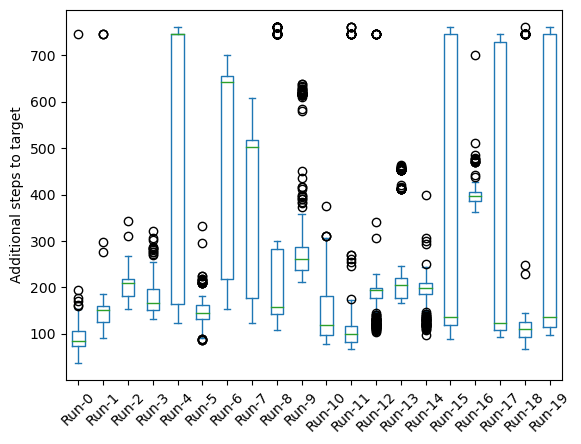

In [3]:
plot_extra_steps_from_file('./Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/extra_steps.csv')

Let's pick Run-3

In [4]:
ground_air_test_folder = './Test_GroundAir_FSVI_300it_100exp_099g_e6eps_20run_20231121_165329/'

In [42]:
# Retrieving the Simulations of a run
RUN_ID = 5
simulations_df = pd.read_csv(ground_air_test_folder + f'Simulations/run-{RUN_ID}-sims.csv', index_col=0)

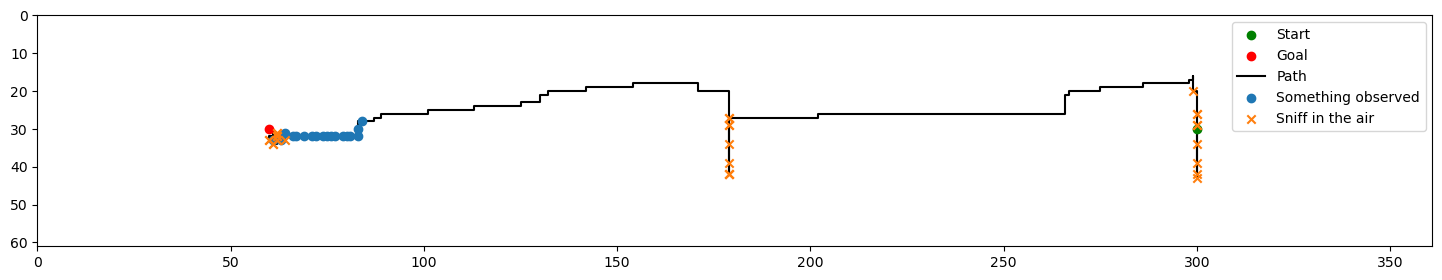

In [46]:
# Plotting a particular simulation
SIM_ID = 5

sim_steps = simulations_df[f'Sim-{SIM_ID}'].tolist()
sim_steps = [json.loads(step) for step in sim_steps if isinstance(step, str)]

# Generation of sim history
sim_hist = SimulationHistory(model, sim_steps[0]['s'], Belief(model))

sim_hist.states = [step['s'] for step in sim_steps] + [model.end_states[0]]
sim_hist.actions = [step['a'] for step in sim_steps]
sim_hist.observations = [step['o'] for step in sim_steps]
sim_hist.rewards = [step['r'] for step in sim_steps]

# Actual plot
plot_steps(sim_hist)